Link : https://www.kaggle.com/code/sathianpong/3-ways-to-implement-mlp-with-keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import serial

In [2]:
path_to_datasets = "../../neural_network/dataset_publications/datas/train_data"

# Training data
train_X_val = np.load(f"{path_to_datasets}/X.npy")
train_X_signal = train_X_val[::,:-2] # remove frequency at the end to get a good looking signal
train_X_freq = train_X_val[::,-2:] # frequency handled separately
train_X_PCA = np.load(f"{path_to_datasets}/X_train.npy")

train_Y_temp = np.load(f"{path_to_datasets}/y_train.npy")

# Test data
test_X_PCA = np.load(f"{path_to_datasets}/X_test.npy")
test_Y_temp = np.load(f"{path_to_datasets}/y_test.npy")

In [3]:
# Vectorize Y for training and test
# Classes :
# - [0] : 'A' (Atrial premature contraction)
# - [1] : 'L' (Left bundle branch block fluctuation)
# - [2] : 'N' (Normal)
# - [3] : 'R' (Right bundle branch block fluctuation)
# - [4] : 'V' (premature ventricular contraction)

def vectorize_Y(arr):
    mapping = {'A': [1, 0, 0, 0, 0],
               'L': [0, 1, 0, 0, 0],
               'N': [0, 0, 1, 0, 0],
               'R': [0, 0, 0, 1, 0],
               'V': [0, 0, 0, 0, 1]}
    
    res = np.array([mapping[val] for val in arr])
    return res

def devectorize_Y(vectorized_arr):
    mapping = {(1, 0, 0, 0, 0): 'A',
                (0, 1, 0, 0, 0): 'L',
                (0, 0, 1, 0, 0): 'N',
                (0, 0, 0, 1, 0): 'R',
                (0, 0, 0, 0, 1): 'V'}
    res = np.array([mapping[tuple(vec)] for vec in vectorized_arr])
    return res

# Vectorize train and test data
train_Y = vectorize_Y(train_Y_temp)
test_Y = vectorize_Y(test_Y_temp)

print(f"Input shape (PCA) : {train_X_PCA.shape}")
print(f"Output shape : {train_Y.shape}")


Input shape (PCA) : (5000, 10)
Output shape : (5000, 5)


## Printing dataset samples

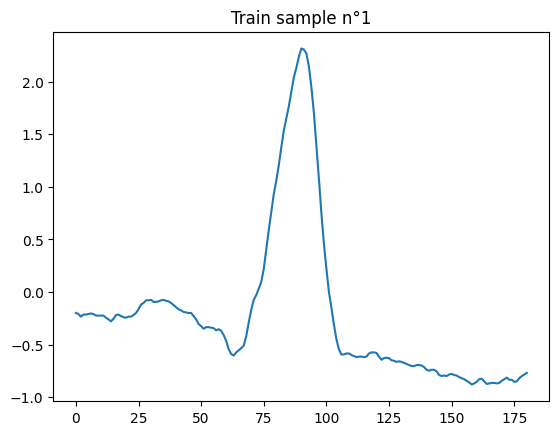

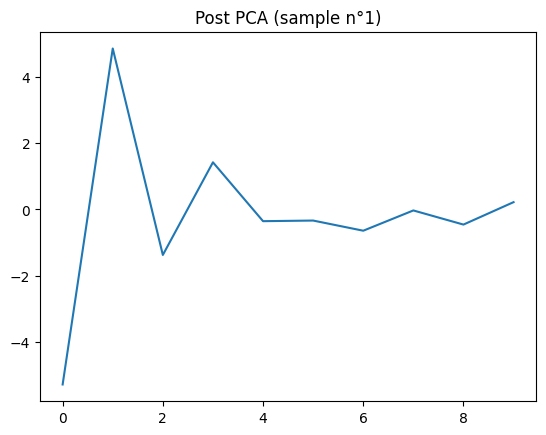

In [4]:
index_shown = 1

plt.plot(np.arange(0, train_X_signal.shape[1]), train_X_signal[index_shown])
plt.title(f"Train sample n°{index_shown}")
plt.show()

plt.plot(np.arange(0, train_X_PCA.shape[1]), train_X_PCA[index_shown])
plt.title(f"Post PCA (sample n°{index_shown})")
plt.show()

In [5]:
# Comptage des différentes classifications

def count_occurrences(arr):
    unique, counts = np.unique(arr, return_counts=True)
    return dict(zip(unique, counts))

count_occurrences(train_Y_temp)

{'A': 971, 'L': 995, 'N': 1038, 'R': 1029, 'V': 967}

# MLP 

In [6]:
# MLP Layers - post PCA NN

input_layer = tf.keras.Input(shape=(train_X_signal.shape[1],))
hidden1 = tf.keras.layers.Dense(64, activation='relu')(input_layer)
hidden2 = tf.keras.layers.Dense(64, activation='relu')(hidden1)
output_layer = tf.keras.layers.Dense(5, activation='softmax')(hidden2)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer, name="MLP-cardIAc-V1")

model.summary()

Model: "MLP-cardIAc-V1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 181)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,133 (63.02 KB)

 Trainable params: 16,133 (63.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5156 - loss: 1.2257 - val_accuracy: 0.8130 - val_loss: 0.6882
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8193 - loss: 0.6223 - val_accuracy: 0.8530 - val_loss: 0.4867
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8533 - loss: 0.4589 - val_accuracy: 0.8710 - val_loss: 0.4264
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8798 - loss: 0.3792 - val_accuracy: 0.8830 - val_loss: 0.3566
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8994 - loss: 0.3135 - val_accuracy: 0.9070 - val_loss: 0.3061
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.9082 - loss: 0.2746 - val_accuracy: 0.9100 - val_loss: 0.2797
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9140 - loss: 0.2638 - val_accuracy: 0.9170 - val_loss: 0.2731
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.9355 - loss: 0.2149 - val_accuracy: 0.9130 - val

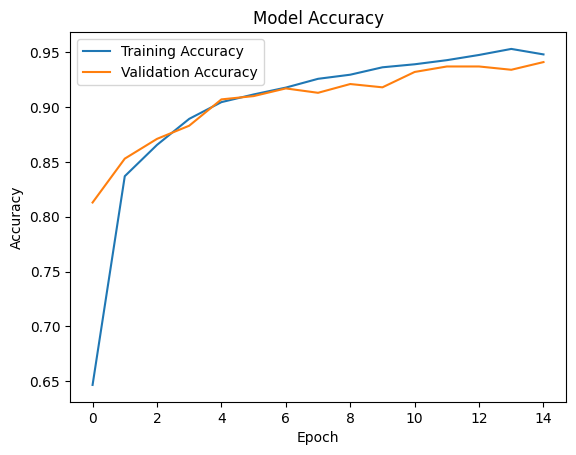

In [7]:
# Compile and train the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_X_signal, 
    train_Y, 
    epochs = 15, 
    batch_size=50,
    validation_split=0.2
)

# Plot the accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model.save("MLP_cardIAc.keras")